# 3-2-ChIP-Analysis
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. Filtering
    * 2.1 H3K27ac
        * 2.1.1 Filtering
        * 2.1.2 Read retainment
    * 2.2 H3K4me1
        * 2.2.1 Filtering
        * 2.2.2 Read retainment
* 3. Quality metrics
    * 3.1 Fingerprint plots
        * 3.1.1 H3K27ac
        * 3.2.2 H3K4me1
    * 3.2 SSP
        * 3.2.1 H3K27ac
        * 3.2.2 H3K4me1
* 4. Coverage
    * 4.1 H3K27ac
    * 4.2 H3K4me1
* 5. Peak calling
    * 5.1 H3K27ac
    * 5.2 H3K4me1

## Files
* Input:  X1-H3K27ace-_S12_L001_final.sam, X1-H3K27ace-_S12_L002_final.sam, X1-H3K27ace-_S12_L003_final.sam, X1-H3K27ace-_S12_L004_final.sam, X1-input-_S9_L001_final.sam, X1-input-_S9_L002_final.sam, X1-input-_S9_L003_final.sam, X1-input-_S9_L004_final.sam, x1_h3k27ac_rep2_final.sam, x1_h3k27ac_rep3_final.sam, x1_input_rep2_final.sam, x1_input_rep3_final.sam, h3k4me1_rep1_final.sam, h3k4me1_rep2_final.sam, input_rep1_final.sam, input_rep2_final.sam
* Output: X1-H3K27ac-meanlog2.bw, h3k4me1meanlog2.bw, k27ac_pooled_april21_summits.bed, k4me1_summits.bed

# 1. Introduction

The H3K27ac and H3K4me1 ChIP-seq alignment files were filtered, quality metrics calculated, coverage files generated and peaks called.  

# 2. Filtering reads

## 2.1 K27ac

### 2.1.1 Filtering

Sam files had been generated successfully:

The sam files were converted to bam files:

In [1]:
%%bash
cd /hydra/chip_neiro/k27ac
less rep1_sam2bam.sh

#!/bin/bash
#samtools view -b -S X1-H3K27ace-_S12_L001_final.sam > X1-H3K27ace-_S12_L001_final.bam
samtools view -b -S X1-H3K27ace-_S12_L002_final.sam > X1-H3K27ace-_S12_L002_final.bam
samtools view -b -S X1-H3K27ace-_S12_L003_final.sam > X1-H3K27ace-_S12_L003_final.bam
samtools view -b -S X1-H3K27ace-_S12_L004_final.sam > X1-H3K27ace-_S12_L004_final.bam
samtools view -b -S X1-input-_S9_L001_final.sam > X1-input-_S9_L001_final.bam
samtools view -b -S X1-input-_S9_L002_final.sam > X1-input-_S9_L002_final.bam
samtools view -b -S X1-input-_S9_L003_final.sam > X1-input-_S9_L003_final.bam
samtools view -b -S X1-input-_S9_L004_final.sam > X1-input-_S9_L004_final.bam


In [2]:
%%bash
cd /hydra/chip_neiro/k27ac
less rep23_sam2bam.sh

#!/bin/bash

samtools view -b -S x1_h3k27ac_rep2_final.sam > x1_h3k27ac_rep2_final.bam
samtools view -b -S x1_h3k27ac_rep3_final.sam > x1_h3k27ac_rep3_final.bam
samtools view -b -S x1_input_rep2_final.sam > x1_input_rep2_final.bam
samtools view -b -S x1_input_rep3_final.sam > x1_input_rep3_final.bam


In [24]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
#nohup ./rep23_sam2bam.sh &
#nohup ./rep1_sam2bam.sh &

The sam files were quality filtered and duplicates removed:

In [1]:
%%bash
cd /hydra/chip_neiro/k27ac
less samq.sh

#!/bin/bash

samtools view -q 10 -b X1-H3K27ace-_S12_L001_final.bam > X1-H3K27ace-L001.uniq.bam
samtools view -q 10 -b X1-H3K27ace-_S12_L002_final.bam > X1-H3K27ace-L002.uniq.bam
samtools view -q 10 -b X1-H3K27ace-_S12_L003_final.bam > X1-H3K27ace-L003.uniq.bam
samtools view -q 10 -b X1-H3K27ace-_S12_L004_final.bam > X1-H3K27ace-L004.uniq.bam
samtools view -q 10 -b x1_h3k27ac_rep2_final.bam > x1_h3k27ac_rep2.uniq.bam
samtools view -q 10 -b x1_h3k27ac_rep3_final.bam > x1_h3k27ac_rep3.uniq.bam
samtools view -q 10 -b x1_input_rep2_final.bam > x1_input_rep2.uniq.bam
samtools view -q 10 -b x1_input_rep3_final.bam > x1_input_rep3.uniq.bam 
samtools view -q 10 -b X1-input-_S9_L001_final.bam > X1-input-L001.uniq.bam
samtools view -q 10 -b X1-input-_S9_L002_final.bam > X1-input-L002.uniq.bam
samtools view -q 10 -b X1-input-_S9_L003_final.bam > X1-input-L003.uniq.bam
samtools view -q 10 -b X1-input-_S9_L004_final.bam > X1-input-L004.uniq.bam

samtools sort X1-H3K27ace-L001.uniq.bam -o X1-H3K27ac

In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
#nohup ./samq.sh &

In [6]:
%%bash
cd /hydra/chip_neiro/k27ac
less rmdup.sh

#!/bin/bash

samtools rmdup X1-H3K27ace-L001.uniq.sorted.bam X1-H3K27ace-L001.uniq.sorted.rmdup.bam 
samtools rmdup X1-H3K27ace-L002.uniq.sorted.bam X1-H3K27ace-L002.uniq.sorted.rmdup.bam
samtools rmdup X1-H3K27ace-L003.uniq.sorted.bam X1-H3K27ace-L003.uniq.sorted.rmdup.bam 
samtools rmdup X1-H3K27ace-L004.uniq.sorted.bam X1-H3K27ace-L004.uniq.sorted.rmdup.bam

samtools rmdup x1_h3k27ac_rep2.uniq.sorted.bam x1_h3k27ac_rep2.uniq.sorted.rmdup.bam 
samtools rmdup x1_h3k27ac_rep3.uniq.sorted.bam x1_h3k27ac_rep3.uniq.sorted.rmdup.bam 
samtools rmdup x1_input_rep2.uniq.sorted.bam x1_input_rep2.uniq.sorted.rmdup.bam
samtools rmdup x1_input_rep3.uniq.sorted.bam x1_input_rep3.uniq.sorted.rmdup.bam

samtools rmdup X1-input-L001.uniq.sorted.bam X1-input-L001.uniq.sorted.rmdup.bam 
samtools rmdup X1-input-L002.uniq.sorted.bam X1-input-L002.uniq.sorted.rmdup.bam
samtools rmdup X1-input-L003.uniq.sorted.bam X1-input-L003.uniq.sorted.rmdup.bam
samtools rmdup X1-input-L004.uniq.sorted.bam X1-input-L00

The number of reads before filtering:

**K27ac**

* L1 14350698
* L2 14365907
* L3 14192897
* L4 14338431
* Input L1 4550299
* Input L2 4556222
* Input L3 4487250
* Input L4 4543070
* Rep2 27883302
* Rep3 29756249
* Input2 29995548
* Input3 39350607

**k4me1**

* Rep1 31255500
* Rep2 30375659
* Input1 32650848
* Input2 26671786

### 2.1.2 Read retainment

The retainment of reads after various filtering steps was investigated: 

### X1-H3K27ace-_S12_L001

In [5]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-_S12_L001_final.bam

26035000 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
21630571 + 0 mapped (83.08% : N/A)
26035000 + 0 paired in sequencing
13017500 + 0 read1
13017500 + 0 read2
20802360 + 0 properly paired (79.90% : N/A)
21081460 + 0 with itself and mate mapped
549111 + 0 singletons (2.11% : N/A)
243040 + 0 with mate mapped to a different chr
84923 + 0 with mate mapped to a different chr (mapQ>=5)


In [7]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-L001.uniq.sorted.rmdup.bam

12059938 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
12059938 + 0 mapped (100.00% : N/A)
12059938 + 0 paired in sequencing
6050036 + 0 read1
6009902 + 0 read2
11684824 + 0 properly paired (96.89% : N/A)
11789865 + 0 with itself and mate mapped
270073 + 0 singletons (2.24% : N/A)
78601 + 0 with mate mapped to a different chr
78601 + 0 with mate mapped to a different chr (mapQ>=5)


In [28]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-_S12_L001_final.sambamba.bam

8750971 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8750971 + 0 mapped (100.00% : N/A)
8750971 + 0 paired in sequencing
4363444 + 0 read1
4387527 + 0 read2
8439658 + 0 properly paired (96.44% : N/A)
8527488 + 0 with itself and mate mapped
223483 + 0 singletons (2.55% : N/A)
63199 + 0 with mate mapped to a different chr
50844 + 0 with mate mapped to a different chr (mapQ>=5)


In [29]:
print(26035000/(2*14350698))
print(12059938/(2*14350698))
print(8750971 /(2*14350698))

0.9070987348489948
0.42018646061675885
0.30489705100058545


In [3]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-_S9_L001_final.bam

8910178 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8269977 + 0 mapped (92.81% : N/A)
8910178 + 0 paired in sequencing
4455089 + 0 read1
4455089 + 0 read2
7973294 + 0 properly paired (89.49% : N/A)
8074598 + 0 with itself and mate mapped
195379 + 0 singletons (2.19% : N/A)
91588 + 0 with mate mapped to a different chr
32621 + 0 with mate mapped to a different chr (mapQ>=5)


In [6]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-L001.uniq.sorted.rmdup.bam

4279494 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
4279494 + 0 mapped (100.00% : N/A)
4279494 + 0 paired in sequencing
2147470 + 0 read1
2132024 + 0 read2
4156786 + 0 properly paired (97.13% : N/A)
4193812 + 0 with itself and mate mapped
85682 + 0 singletons (2.00% : N/A)
30160 + 0 with mate mapped to a different chr
30160 + 0 with mate mapped to a different chr (mapQ>=5)


In [8]:
print(8910178/(2*(4550299)))
print(4279494/(2*(4550299)))

0.9790761002738502
0.47024316424041585


### X1-H3K27ace-_S12_L002

In [2]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-_S12_L002_final.bam

26119234 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
21662153 + 0 mapped (82.94% : N/A)
26119234 + 0 paired in sequencing
13059617 + 0 read1
13059617 + 0 read2
20833028 + 0 properly paired (79.76% : N/A)
21107960 + 0 with itself and mate mapped
554193 + 0 singletons (2.12% : N/A)
239320 + 0 with mate mapped to a different chr
82702 + 0 with mate mapped to a different chr (mapQ>=5)


In [11]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-L002.uniq.sorted.rmdup.bam

12065870 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
12065870 + 0 mapped (100.00% : N/A)
12065870 + 0 paired in sequencing
6054917 + 0 read1
6010953 + 0 read2
11691446 + 0 properly paired (96.90% : N/A)
11794191 + 0 with itself and mate mapped
271679 + 0 singletons (2.25% : N/A)
76485 + 0 with mate mapped to a different chr
76485 + 0 with mate mapped to a different chr (mapQ>=5)


In [14]:
print(26119234/(2*14365907))
print(12065870/(2*14365907))

0.9090701338940869
0.41994807567666975


In [13]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-_S9_L001_final.bam

8910178 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8269977 + 0 mapped (92.81% : N/A)
8910178 + 0 paired in sequencing
4455089 + 0 read1
4455089 + 0 read2
7973294 + 0 properly paired (89.49% : N/A)
8074598 + 0 with itself and mate mapped
195379 + 0 singletons (2.19% : N/A)
91588 + 0 with mate mapped to a different chr
32621 + 0 with mate mapped to a different chr (mapQ>=5)


In [10]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-L002.uniq.sorted.rmdup.bam

4280156 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
4280156 + 0 mapped (100.00% : N/A)
4280156 + 0 paired in sequencing
2149118 + 0 read1
2131038 + 0 read2
4155986 + 0 properly paired (97.10% : N/A)
4192019 + 0 with itself and mate mapped
88137 + 0 singletons (2.06% : N/A)
29281 + 0 with mate mapped to a different chr
29281 + 0 with mate mapped to a different chr (mapQ>=5)


In [15]:
print(8910178/(2*4556222))
print(4280156/(2*4556222))

0.977803320382545
0.46970450517994955


### X1-H3K27ace-_S12_L003

In [3]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-_S12_L003_final.bam

25750084 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
21297804 + 0 mapped (82.71% : N/A)
25750084 + 0 paired in sequencing
12875042 + 0 read1
12875042 + 0 read2
20488604 + 0 properly paired (79.57% : N/A)
20760372 + 0 with itself and mate mapped
537432 + 0 singletons (2.09% : N/A)
236564 + 0 with mate mapped to a different chr
82053 + 0 with mate mapped to a different chr (mapQ>=5)


In [12]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-L003.uniq.sorted.rmdup.bam

11826799 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
11826799 + 0 mapped (100.00% : N/A)
11826799 + 0 paired in sequencing
5932299 + 0 read1
5894500 + 0 read2
11463610 + 0 properly paired (96.93% : N/A)
11565115 + 0 with itself and mate mapped
261684 + 0 singletons (2.21% : N/A)
75742 + 0 with mate mapped to a different chr
75742 + 0 with mate mapped to a different chr (mapQ>=5)


In [15]:
print(25750084/(2*14192897))
print(11826799/(2*14192897))

0.9071468636741322
0.41664499502814684


In [18]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-_S9_L003_final.bam

8790628 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8138942 + 0 mapped (92.59% : N/A)
8790628 + 0 paired in sequencing
4395314 + 0 read1
4395314 + 0 read2
7849684 + 0 properly paired (89.30% : N/A)
7948000 + 0 with itself and mate mapped
190942 + 0 singletons (2.17% : N/A)
88824 + 0 with mate mapped to a different chr
31454 + 0 with mate mapped to a different chr (mapQ>=5)


In [19]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-L003.uniq.sorted.rmdup.bam

4188930 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
4188930 + 0 mapped (100.00% : N/A)
4188930 + 0 paired in sequencing
2101740 + 0 read1
2087190 + 0 read2
4069508 + 0 properly paired (97.15% : N/A)
4105186 + 0 with itself and mate mapped
83744 + 0 singletons (2.00% : N/A)
29024 + 0 with mate mapped to a different chr
29024 + 0 with mate mapped to a different chr (mapQ>=5)


In [20]:
print(8790628/(2*4487250))
print(4188930/(2*4487250))

0.9795117276728509
0.46675915092762826


### X1-H3K27ace-_S12_L004

In [4]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-_S12_L004_final.bam

26078650 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
21587331 + 0 mapped (82.78% : N/A)
26078650 + 0 paired in sequencing
13039325 + 0 read1
13039325 + 0 read2
20768416 + 0 properly paired (79.64% : N/A)
21041792 + 0 with itself and mate mapped
545539 + 0 singletons (2.09% : N/A)
237764 + 0 with mate mapped to a different chr
82288 + 0 with mate mapped to a different chr (mapQ>=5)


In [16]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-H3K27ace-L004.uniq.sorted.rmdup.bam

11985194 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
11985194 + 0 mapped (100.00% : N/A)
11985194 + 0 paired in sequencing
6012546 + 0 read1
5972648 + 0 read2
11617396 + 0 properly paired (96.93% : N/A)
11719546 + 0 with itself and mate mapped
265648 + 0 singletons (2.22% : N/A)
75945 + 0 with mate mapped to a different chr
75945 + 0 with mate mapped to a different chr (mapQ>=5)


In [17]:
print(26078650/(2*14338431))
print(11985194/(2*14338431))

0.909396920764901
0.41793952211368174


In [22]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-_S9_L004_final.bam

8906412 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8248785 + 0 mapped (92.62% : N/A)
8906412 + 0 paired in sequencing
4453206 + 0 read1
4453206 + 0 read2
7953630 + 0 properly paired (89.30% : N/A)
8052464 + 0 with itself and mate mapped
196321 + 0 singletons (2.20% : N/A)
89480 + 0 with mate mapped to a different chr
31514 + 0 with mate mapped to a different chr (mapQ>=5)


In [23]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat X1-input-L004.uniq.sorted.rmdup.bam

4247816 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
4247816 + 0 mapped (100.00% : N/A)
4247816 + 0 paired in sequencing
2132107 + 0 read1
2115709 + 0 read2
4126300 + 0 properly paired (97.14% : N/A)
4161909 + 0 with itself and mate mapped
85907 + 0 singletons (2.02% : N/A)
29105 + 0 with mate mapped to a different chr
29105 + 0 with mate mapped to a different chr (mapQ>=5)


In [25]:
print((8906412)/(2*4543070))
print((4247816)/(2*4543070))

0.9802195431723482
0.46750501312988796


### x1_h3k27ac_rep2

In [5]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
samtools flagstat x1_h3k27ac_rep2_final.bam

55766604 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
51471583 + 0 mapped (92.30% : N/A)
55766604 + 0 paired in sequencing
27883302 + 0 read1
27883302 + 0 read2
48363804 + 0 properly paired (86.73% : N/A)
50218906 + 0 with itself and mate mapped
1252677 + 0 singletons (2.25% : N/A)
1269740 + 0 with mate mapped to a different chr
390241 + 0 with mate mapped to a different chr (mapQ>=5)


In [21]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat x1_h3k27ac_rep2.uniq.sorted.rmdup.bam

30534506 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30534506 + 0 mapped (100.00% : N/A)
30534506 + 0 paired in sequencing
15290610 + 0 read1
15243896 + 0 read2
29031350 + 0 properly paired (95.08% : N/A)
29904870 + 0 with itself and mate mapped
629636 + 0 singletons (2.06% : N/A)
374451 + 0 with mate mapped to a different chr
374451 + 0 with mate mapped to a different chr (mapQ>=5)


In [23]:
print(55766604/(2*29756249))
print(30534506/(2*29756249))

1.0
0.5475410695619909


In [26]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat x1_input_rep2_final.bam

59991096 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
56530853 + 0 mapped (94.23% : N/A)
59991096 + 0 paired in sequencing
29995548 + 0 read1
29995548 + 0 read2
53297566 + 0 properly paired (88.84% : N/A)
55140140 + 0 with itself and mate mapped
1390713 + 0 singletons (2.32% : N/A)
1498486 + 0 with mate mapped to a different chr
473456 + 0 with mate mapped to a different chr (mapQ>=5)


In [ ]:
%%bash
cd /hydra/chip_neiro/k27ac


### x1_h3k27ac_rep3

In [6]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
samtools flagstat x1_h3k27ac_rep3_final.bam

59512498 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
52809449 + 0 mapped (88.74% : N/A)
59512498 + 0 paired in sequencing
29756249 + 0 read1
29756249 + 0 read2
50277248 + 0 properly paired (84.48% : N/A)
51534552 + 0 with itself and mate mapped
1274897 + 0 singletons (2.14% : N/A)
1055866 + 0 with mate mapped to a different chr
355018 + 0 with mate mapped to a different chr (mapQ>=5)


In [24]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat x1_h3k27ac_rep3.uniq.sorted.rmdup.bam

31083815 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
31083815 + 0 mapped (100.00% : N/A)
31083815 + 0 paired in sequencing
15590441 + 0 read1
15493374 + 0 read2
29926450 + 0 properly paired (96.28% : N/A)
30425252 + 0 with itself and mate mapped
658563 + 0 singletons (2.12% : N/A)
339325 + 0 with mate mapped to a different chr
339325 + 0 with mate mapped to a different chr (mapQ>=5)


In [27]:
print(59512498/(2*(29756249)))
print(31083815/(2*(29756249)))

1.0
0.5223073479456366


In [32]:
%%bash
cd /hydra/chip_neiro/k27ac
samtools flagstat x1_input_rep3_final.bam

78701214 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
74185510 + 0 mapped (94.26% : N/A)
78701214 + 0 paired in sequencing
39350607 + 0 read1
39350607 + 0 read2
71082856 + 0 properly paired (90.32% : N/A)
72558088 + 0 with itself and mate mapped
1627422 + 0 singletons (2.07% : N/A)
1343156 + 0 with mate mapped to a different chr
453341 + 0 with mate mapped to a different chr (mapQ>=5)


## 2.2 K4me1

### 2.2.1 Filtering

The sam files had been generated successfully.

The sam files were converted to bam files:

In [8]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
less sam2bam.sh

#!/bin/bash

samtools view -b -S h3k4me1_rep1_final.sam > h3k4me1_rep1_final.bam
samtools view -b -S h3k4me1_rep2_final.sam > h3k4me1_rep2_final.bam
samtools view -b -S input_rep1_final.sam > input_rep1_final.bam
samtools view -b -S input_rep2_final.sam > input_rep2_final.bam


The sam files were quality-filtered and duplicates were removed:

In [44]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
less samq.sh

#!/bin/bash

samtools view -q 10 -b h3k4me1_rep1_final.bam > h3k4me1_rep1.uniq.bam
samtools view -q 10 -b h3k4me1_rep2_final.bam > h3k4me1_rep2.uniq.bam
samtools view -q 10 -b input_rep1_final.bam > input_rep1.uniq.bam
samtools view -q 10 -b input_rep2_final.bam > input_rep2.uniq.bam

samtools sort h3k4me1_rep1.uniq.bam > h3k4me1_rep1.uniq.sorted.bam
samtools sort h3k4me1_rep2.uniq.bam > h3k4me1_rep2.uniq.sorted.bam
samtools sort input_rep1.uniq.bam > input_rep1.uniq.sorted.bam
samtools sort input_rep2.uniq.bam > input_rep2.uniq.sorted.bam


In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
#nohup ./samq.sh &

In [7]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
less rmdup.sh

#!/bin/bash

samtools rmdup h3k4me1_rep1.uniq.sorted.bam h3k4me1_rep1.uniq.sorted.rmdup.bam
samtools rmdup h3k4me1_rep2.uniq.sorted.bam h3k4me1_rep2.uniq.sorted.rmdup.bam
samtools rmdup input_rep1.uniq.sorted.bam input_rep1.uniq.sorted.rmdup.bam
samtools rmdup input_rep2.uniq.sorted.bam input_rep2.uniq.sorted.rmdup.bam


In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
#nohup ./rmdup.sh &

### 2.2.2 Read retainment

The retainment of reads after various filtering steps was investigated: 

In [19]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
samtools flagstat h3k4me1_rep1.uniq.sorted.rmdup.bam

29513187 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
29513187 + 0 mapped (100.00% : N/A)
29513187 + 0 paired in sequencing
14815743 + 0 read1
14697444 + 0 read2
28116882 + 0 properly paired (95.27% : N/A)
28810034 + 0 with itself and mate mapped
703153 + 0 singletons (2.38% : N/A)
384549 + 0 with mate mapped to a different chr
384549 + 0 with mate mapped to a different chr (mapQ>=5)


In [33]:
print(29513187/(2*31255500))

0.47212789749004175


In [29]:
%%bash
cd /hydra/chip_neiro/k4me1
samtools flagstat input_rep1.uniq.sorted.rmdup.bam

28596411 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
28596411 + 0 mapped (100.00% : N/A)
28596411 + 0 paired in sequencing
14339549 + 0 read1
14256862 + 0 read2
27668678 + 0 properly paired (96.76% : N/A)
28012848 + 0 with itself and mate mapped
583563 + 0 singletons (2.04% : N/A)
251396 + 0 with mate mapped to a different chr
251396 + 0 with mate mapped to a different chr (mapQ>=5)


In [30]:
print(28596411/(2*32650848))

0.43791222512811917


In [21]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
samtools flagstat h3k4me1_rep2.uniq.sorted.rmdup.bam

30340947 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30340947 + 0 mapped (100.00% : N/A)
30340947 + 0 paired in sequencing
15227657 + 0 read1
15113290 + 0 read2
29011620 + 0 properly paired (95.62% : N/A)
29637030 + 0 with itself and mate mapped
703917 + 0 singletons (2.32% : N/A)
365802 + 0 with mate mapped to a different chr
365802 + 0 with mate mapped to a different chr (mapQ>=5)


In [36]:
30340947/(2*30375650)

0.49942876942551023

%%bash
cd /hydra/chip_neiro/k4me1
samtools flagstat input_rep2.uniq.sorted.rmdup.bam

In [37]:
26671786/(2*24459719)

0.5452185693547829

# 3. Quality metrics

The quality of the H3K27ac and H3K4me1 ChIP-seq data was inspected using a number of quality metrics.

## 3.1 Fingerprint plots

Fingerprint plots were generated using Deeptools2.

### 3.1.1 H3K27ac

In [3]:
%%bash
cd /hydra/chip_neiro/k27ac
echo "#!/bin/bash" > fingerprintplots.sh
echo "plotFingerprint -b X1-H3K27ace-L001.uniq.sorted.rmdup.bam X1-input-L001.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L1_fingerprint.png" >> fingerprintplots.sh
echo "plotFingerprint -b X1-H3K27ace-L002.uniq.sorted.rmdup.bam X1-input-L002.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L2_fingerprint.png" >> fingerprintplots.sh
echo "plotFingerprint -b X1-H3K27ace-L003.uniq.sorted.rmdup.bam X1-input-L003.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L3_fingerprint.png" >> fingerprintplots.sh
echo "plotFingerprint -b X1-H3K27ace-L004.uniq.sorted.rmdup.bam X1-input-L004.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L4_fingerprint.png" >> fingerprintplots.sh
echo "plotFingerprint -b x1_h3k27ac_rep2.uniq.sorted.rmdup.bam x1_input_rep2_final.bam -plot fingerprint_plots/h3k27ac_rep2_fingerprint.png" >> fingerprintplots.sh
chmod +x fingerprintplots.sh
less fingerprintplots.sh

#!/bin/bash
plotFingerprint -b X1-H3K27ace-L001.uniq.sorted.rmdup.bam X1-input-L001.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L1_fingerprint.png
plotFingerprint -b X1-H3K27ace-L002.uniq.sorted.rmdup.bam X1-input-L002.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L2_fingerprint.png
plotFingerprint -b X1-H3K27ace-L003.uniq.sorted.rmdup.bam X1-input-L003.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L3_fingerprint.png
plotFingerprint -b X1-H3K27ace-L004.uniq.sorted.rmdup.bam X1-input-L004.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_L4_fingerprint.png
plotFingerprint -b x1_h3k27ac_rep2.uniq.sorted.rmdup.bam x1_input_rep2_final.bam -plot fingerprint_plots/h3k27ac_rep2_fingerprint.png


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#nohup ./fingerprintplots.sh &

In [40]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#plotFingerprint -b x1_h3k27ac_rep3.uniq.sorted.rmdup.bam x1_input_rep3.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k27ac_rep3_fingerprint.png

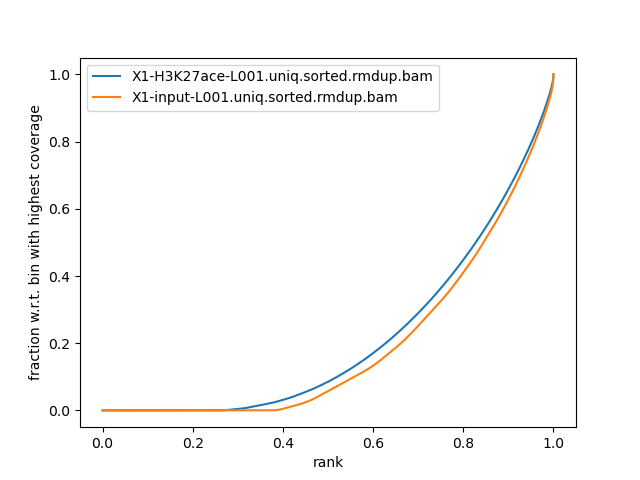

In [4]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_L1_fingerprint.png')

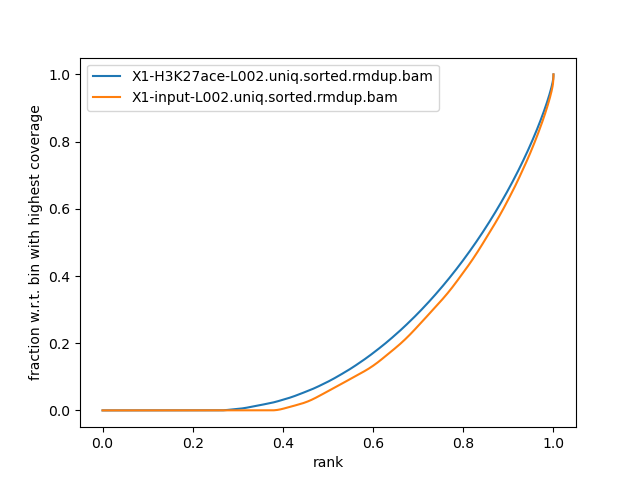

In [38]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_L2_fingerprint.png')

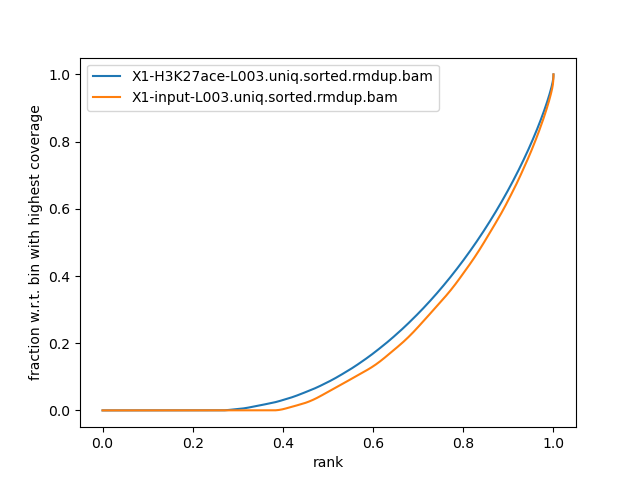

In [39]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_L3_fingerprint.png')

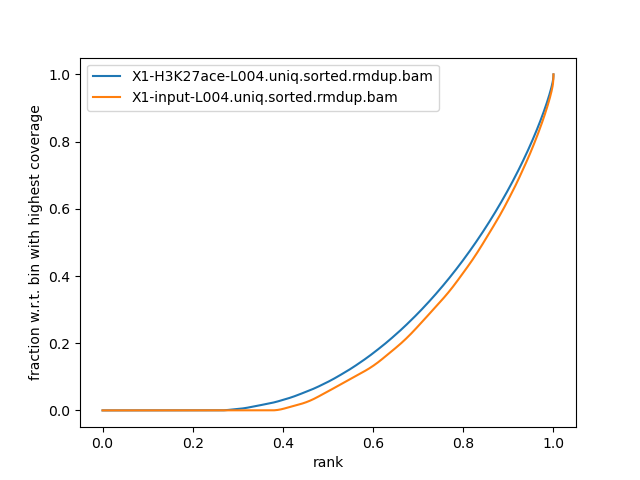

In [40]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_L4_fingerprint.png')

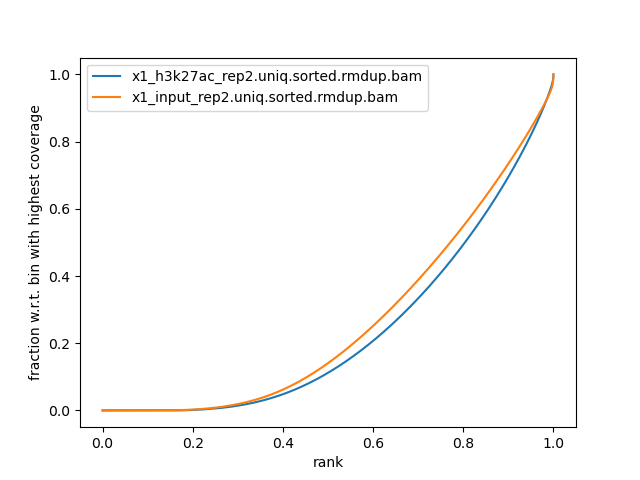

In [1]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_rep2_fingerprint.png')

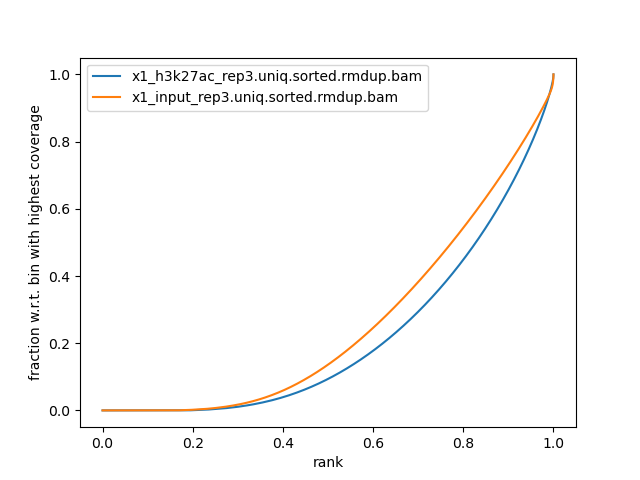

In [41]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/fingerprint_plots/h3k27ac_rep3_fingerprint.png')

### 3.1.2 H3K4me1

In [3]:
%%bash
cd /hydra/chip_neiro/k4me1
echo "#!/bin/bash" > fingerprintplots.sh
echo "plotFingerprint -b h3k4me1_rep1.uniq.sorted.rmdup.bam input_rep1.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k4me1_rep1_fingerprint.png" >> fingerprintplots.sh
echo "plotFingerprint -b h3k4me1_rep2.uniq.sorted.rmdup.bam input_rep2.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k4me1_rep2_fingerprint.png" >> fingerprintplots.sh
chmod +x fingerprintplots.sh
less fingerprintplots.sh

#!/bin/bash
plotFingerprint -b h3k4me1_rep1.uniq.sorted.rmdup.bam input_rep1.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k4me1_rep1_fingerprint.png
plotFingerprint -b h3k4me1_rep2.uniq.sorted.rmdup.bam input_rep2.uniq.sorted.rmdup.bam -plot fingerprint_plots/h3k4me1_rep2_fingerprint.png


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k4me1
#nohup ./fingerprintplots.sh &

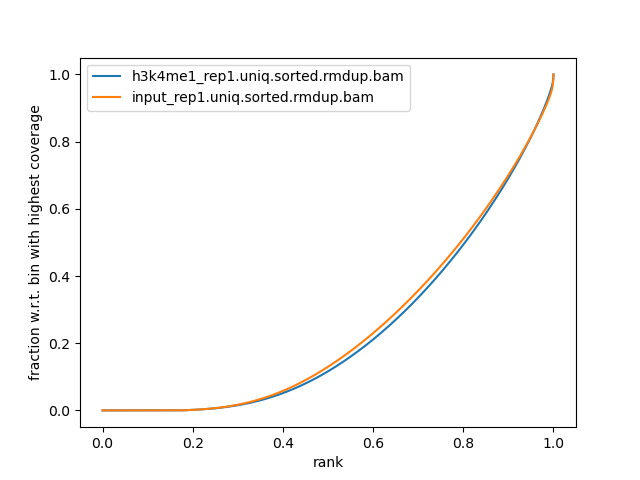

In [24]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k4me1/fingerprint_plots/h3k4me1_rep1_fingerprint.png')

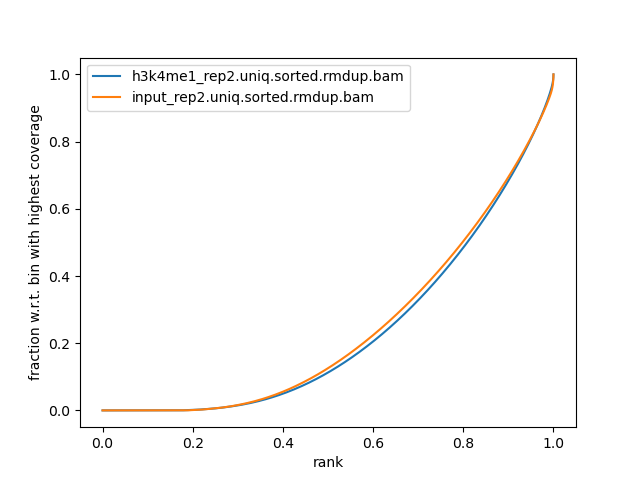

In [26]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k4me1/fingerprint_plots/h3k4me1_rep2_fingerprint.png')

## 3.2 SSP 

Quality metrics were calculated using SSP:

### 3.2.1 H3K27ac

In [47]:
%%bash
cd /hydra/chip_neiro/k27ac
echo "#!/bin/bash" > ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L001.uniq.sorted.rmdup.bam -o h3k27ac_re1L1_ssp --odir h3k27ac_re1L1_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L002.uniq.sorted.rmdup.bam -o h3k27ac_re1L2_ssp --odir h3k27ac_re1L2_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L003.uniq.sorted.rmdup.bam -o h3k27ac_re1L3_ssp --odir h3k27ac_re1L3_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L004.uniq.sorted.rmdup.bam -o h3k27ac_re1L4_ssp --odir h3k27ac_re1L4_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i x1_h3k27ac_rep2.uniq.sorted.rmdup.bam -o h3k27ac_rep2_ssp --odir h3k27ac_rep2_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i x1_h3k27ac_rep3.uniq.sorted.rmdup.bam -o h3k27ac_rep3_ssp --odir h3k27ac_rep3_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
chmod +x ssp.sh
less ssp.sh

#!/bin/bash
/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L001.uniq.sorted.rmdup.bam -o h3k27ac_re1L1_ssp --odir h3k27ac_re1L1_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr
/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L002.uniq.sorted.rmdup.bam -o h3k27ac_re1L2_ssp --odir h3k27ac_re1L2_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr
/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L003.uniq.sorted.rmdup.bam -o h3k27ac_re1L3_ssp --odir h3k27ac_re1L3_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr
/hydra/software/SSP/bin/ssp -i X1-H3K27ace-L004.uniq.sorted.rmdup.bam -o h3k27ac_re1L4_ssp --odir h3k27ac_re1L4_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 

In [ ]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#nohup ./ssp.sh &

### 3.2.2 H3K4me1

In [1]:
%%bash
cd /hydra/chip_neiro/k4me1
ls *bam

h3k4me1_rep1.uniq.sorted.rmdup.bam
h3k4me1_rep2.uniq.sorted.rmdup.bam
input_rep1.uniq.sorted.rmdup.bam
input_rep2.uniq.sorted.rmdup.bam


In [2]:
%%bash
cd /hydra/chip_neiro/k4me1
echo "#!/bin/bash" > ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i h3k4me1_rep1.uniq.sorted.rmdup.bam -o h3k4me1_rep1_ssp --odir h3k4me1_rep1_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
echo  "/hydra/software/SSP/bin/ssp -i h3k4me1_rep2.uniq.sorted.rmdup.bam -o h3k4me1_rep2_ssp --odir h3k4me1_rep2_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr" >> ssp.sh
chmod +x ssp.sh
less ssp.sh

#!/bin/bash
/hydra/software/SSP/bin/ssp -i h3k4me1_rep1.uniq.sorted.rmdup.bam -o h3k4me1_rep1_ssp --odir h3k4me1_rep1_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr
/hydra/software/SSP/bin/ssp -i h3k4me1_rep2.uniq.sorted.rmdup.bam -o h3k4me1_rep2_ssp --odir h3k4me1_rep2_ssp --gt /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome --pair --ng_from 10000 --ng_to 50000 --ng_step 500 --eachchr


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k4me1
#nohup ./ssp.sh &

# 4. Coverage

## 4.1 H3K27ac

Indices were generated:

In [16]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
less bamindex.sh

#!/bin/bash

samtools index -b X1-H3K27ace-L001.uniq.sorted.rmdup.bam
samtools index -b X1-H3K27ace-L002.uniq.sorted.rmdup.bam
samtools index -b X1-H3K27ace-L003.uniq.sorted.rmdup.bam
samtools index -b X1-H3K27ace-L004.uniq.sorted.rmdup.bam

samtools index -b X1-input-L001.uniq.sorted.rmdup.bam
samtools index -b X1-input-L002.uniq.sorted.rmdup.bam
samtools index -b X1-input-L003.uniq.sorted.rmdup.bam
samtools index -b X1-input-L004.uniq.sorted.rmdup.bam

samtools index -b x1_h3k27ac_rep2.uniq.sorted.rmdup.bam
samtools index -b x1_input_rep2.uniq.sorted.rmdup.bam
samtools index -b x1_h3k27ac_rep3.uniq.sorted.rmdup.bam
samtools index -b x1_input_rep3.uniq.sorted.rmdup.bam


In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
#nohup ./bamindex.sh &

Coverge files were generated both as bedgraph and bigwig:

In [1]:
%%bash
cd /hydra/chip_neiro/k27ac
less bamCov.sh

#!/bin/bash

bamCompare -b1 X1-H3K27ace-L001.uniq.sorted.rmdup.bam -b2 X1-input-L001.uniq.sorted.rmdup.bam -o X1-H3K27ac-L001log2.bdg -of bedgraph --scaleFactorsMethod SES --smoothLength 50 -bs 10
bamCompare -b1 X1-H3K27ace-L001.uniq.sorted.rmdup.bam -b2 X1-input-L001.uniq.sorted.rmdup.bam -o X1-H3K27ac-L001log2.bw -of bigwig --scaleFactorsMethod SES --smoothLength 50 -bs 10
 
bamCompare -b1 X1-H3K27ace-L002.uniq.sorted.rmdup.bam -b2 X1-input-L002.uniq.sorted.rmdup.bam -o X1-H3K27ac-L002log2.bdg -of bedgraph --scaleFactorsMethod SES --smoothLength 50 -bs 10
bamCompare -b1 X1-H3K27ace-L002.uniq.sorted.rmdup.bam -b2 X1-input-L002.uniq.sorted.rmdup.bam -o X1-H3K27ac-L002log2.bw -of bigwig --scaleFactorsMethod SES --smoothLength 50 -bs 10

bamCompare -b1 X1-H3K27ace-L003.uniq.sorted.rmdup.bam -b2 X1-input-L003.uniq.sorted.rmdup.bam -o X1-H3K27ac-L003log2.bdg -of bedgraph --scaleFactorsMethod SES --smoothLength 50 -bs 10
bamCompare -b1 X1-H3K27ace-L003.uniq.sorted.rmdup.bam -b2 X1-input-L00

In [ ]:
%%bash
cd /hydra/chip_neiro/k27ac
less bamCov.sh

In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k27ac
#nohup ./bamCov_april21.sh &

In [4]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#bigwigCompare -b1 x1_rep2log2.bw -b2 x1_rep3log2.bw --operation mean -o X1-H3K27ac-meanrep23log2.bw -of bigwig

In [6]:
%%bash
cd /hydra/chip_neiro/k27ac
wiggletools mean x1_rep2log2_april21.bw x1_rep3log2_april21.bw > h3k27ac_mean_april21.bw

In [22]:
%%bash
cd /hydra/chip_neiro/k27ac
wigToBigWig h3k27ac_mean_april21.wig /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome h3k27ac_mean_april21.bw

In [6]:
%%bash
cd /hydra/chip_neiro/k27ac
wiggletools mean x1_rep2log2_april21_100bp.bw x1_rep3log2_april21_100bp.bw > h3k27ac_mean_april21_100bp.wig

In [7]:
%%bash
cd /hydra/chip_neiro/k27ac
wigToBigWig h3k27ac_mean_april21_100bp.wig /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome h3k27ac_mean_april21_100bp.bw

In [5]:
%%bash
cd /hydra/chip_neiro/k27ac
ls X1-H3K27ac-meanrep23log2.bw

X1-H3K27ac-meanrep23log2.bw


In [18]:
%%bash
cd /hydra/chip_neiro/k27ac
ls X1-H3K27ac-meanlog2.bw

X1-H3K27ac-meanlog2.bw


## 4.2 H3K4me1

Indices were generated:

In [17]:
%%bash
cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
less bamindex.sh

#!/bin/bash

samtools index -b h3k4me1_rep1.uniq.sorted.rmdup.bam
samtools index -b h3k4me1_rep2.uniq.sorted.rmdup.bam
samtools index -b input_rep1.uniq.sorted.rmdup.bam
samtools index -b input_rep2.uniq.sorted.rmdup.bam


In [ ]:
#%%bash
#cd ../../../../../data/ngs/smed/facs_rnaseq_datasets/sexual/chip_neiro/k4me1
#nohup ./bamindex.sh &

Coverage files were generated both as bedgraph and bigwig:

In [6]:
%%bash
cd /hydra/chip_neiro/k4me1
less bamCov.sh

#!/bin/bash

bamCompare -b1 h3k4me1_rep1.uniq.sorted.rmdup.bam -b2 input_rep1.uniq.sorted.rmdup.bam -o h3k4me1_rep1log2.bdg -of bedgraph --scaleFactorsMethod SES --smoothLength 50 -bs 10
bamCompare -b1 h3k4me1_rep1.uniq.sorted.rmdup.bam -b2 input_rep1.uniq.sorted.rmdup.bam -o h3k4me1_rep1log2.bw -of bigwig --scaleFactorsMethod SES --smoothLength 50 -bs 10

bamCompare -b1 h3k4me1_rep2.uniq.sorted.rmdup.bam -b2 input_rep2.uniq.sorted.rmdup.bam -o h3k4me1_rep2log2.bdg -of bedgraph --scaleFactorsMethod SES --smoothLength 50 -bs 10
bamCompare -b1 h3k4me1_rep2.uniq.sorted.rmdup.bam -b2 input_rep2.uniq.sorted.rmdup.bam -o h3k4me1_rep2log2.bw -of bigwig --scaleFactorsMethod SES --smoothLength 50 -bs 10


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k4me1
#nohup ./bamCov.sh &

In [3]:
%%bash
cd /hydra/chip_neiro/k4me1
ls *bw

h3k4me1_rep1log2.bw
h3k4me1_rep1log2_april21.bw
h3k4me1_rep1log2_april21_100bp.bw
h3k4me1_rep2log2.bw
h3k4me1_rep2log2_april21_100bp.bw
h3k4me1meanlog2.bw


# 5. Peak calling

The peaks were called for H3K27ac and H3K4me1 ChIP-seq data. Information and instructions on peak calling were taken from (https://www.encodeproject.org/chip-seq/histone/) and (https://bioinformatics-core-shared-training.github.io/cruk-autumn-school-2017/ChIP/Materials/Lectures/Lecture5_Peak%20Calling_SS.pdf). 

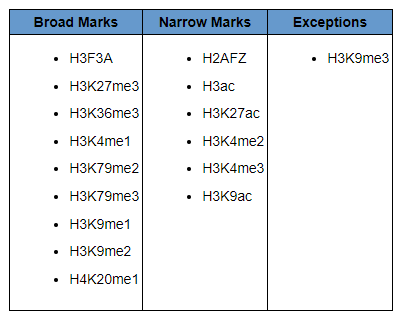

The total size of the genome was calculated: 

In [10]:
import pandas as pd
sizes = pd.read_csv("../sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome", sep="\t", header=None)
sum(sizes.iloc[:,1])

773939492

## 5.1 H3K27ac

The H3K27ac peaks were called with macs2. All samples were used simultaneously. 

In [4]:
%%bash
cd /hydra/chip_neiro/k27ac
less peak_call.sh

#!/bin/bash

macs2 callpeak -t X1-H3K27ace-L001.uniq.sorted.rmdup.bam X1-H3K27ace-L002.uniq.sorted.rmdup.bam X1-H3K27ace-L003.uniq.sorted.rmdup.bam X1-H3K27ace-L004.uniq.sorted.rmdup.bam x1_h3k27ac_rep2.uniq.sorted.rmdup.bam x1_h3k27ac_rep3.uniq.sorted.rmdup.bam -c X1-input-L001.uniq.sorted.rmdup.bam X1-input-L002.uniq.sorted.rmdup.bam X1-input-L003.uniq.sorted.rmdup.bam X1-input-L004.uniq.sorted.rmdup.bam x1_input_rep2.uniq.sorted.rmdup.bam x1_input_rep3.uniq.sorted.rmdup.bam -g 773939492 -n k27ac_pooled_1


As an alternative, only rep2 and rep3 were used: 

In [11]:
%%bash
cd /hydra/chip_neiro/k27ac
less peak_call_april21.sh

#!/bin/bash

macs2 callpeak -t x1_h3k27ac_rep2.uniq.sorted.rmdup.bam x1_h3k27ac_rep3.uniq.sorted.rmdup.bam -c x1_input_rep2.uniq.sorted.rmdup.bam x1_input_rep3.uniq.sorted.rmdup.bam -g 773939492 -n k27ac_pooled_april21


In [3]:
%%bash
cd /hydra/chip_neiro/k27ac
wc -l k27ac_pooled_1_summits.bed
wc -l k27ac_pooled_april21_summits.bed

43313 k27ac_pooled_1_summits.bed
37345 k27ac_pooled_april21_summits.bed


The second alternative was used for downstream analyses. 

## 5.2 H3K4me1

The H3K4me1 peaks were called with macs2. Both rep1 and rep2 were used simultaneously. Peaks were called as broad. 

In [5]:
%%bash
cd /hydra/chip_neiro/k4me1
less peak_call.sh

#!/bin/bash

macs2 callpeak -t h3k4me1_rep1.uniq.sorted.rmdup.bam h3k4me1_rep2.uniq.sorted.rmdup.bam -c input_rep1.uniq.sorted.rmdup.bam input_rep2.uniq.sorted.rmdup.bam -g 773939492 -n k4me1_pooled_1 --broad


Narrow peaks were called as an alternative: 

In [8]:
%%bash
cd /hydra/chip_neiro/k4me1
less peak_call_april21.sh

#!/bin/bash

macs2 callpeak -t h3k4me1_rep1.uniq.sorted.rmdup.bam h3k4me1_rep2.uniq.sorted.rmdup.bam -c input_rep1.uniq.sorted.rmdup.bam input_rep2.uniq.sorted.rmdup.bam -g 773939492 -n k4me1_pooled_april21


In [9]:
#%%bash
#cd /hydra/chip_neiro/k4me1
#nohup ./peak_call_april21.sh &

In [14]:
%%bash
cd /hydra/enhancer_regions
wc -l k4me1_summits.bed

13868 k4me1_summits.bed


In [16]:
%%bash
cd /hydra/chip_neiro/k4me1
wc -l k4me1_pooled_april21_summits.bed

7387 k4me1_pooled_april21_summits.bed


More broad peaks were called than narrow peaks, and therefore k4me1_summits.bed was used in downstream steps. 

# FINNISHED